# Sentiment Analyzer System

In [1]:
#importing necessary libraries
import tweepy,re                 #importing 're' for regular expressions, 'tweepy' for accessing twitter API
from textblob import TextBlob    
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
# authentication 
#for accessing the Twitter API firstly authentication needs to be done


consumerKey = 'KyOw418JY8i5exAIreQBXzHgq'
consumerSecret = 'EmkFCfAoj8MOhRHRTfopDg4FDeU3TghlcZpv7HVdjU5n8ODGfR'
accessToken = '845656932539121665-oQFTwJfFuXlmDpeJefFQnJN825Ibu2f'
accessTokenSecret = 'lb5aCSCZAwUMjeYdGWDwZplWUEYwvihKT0CKcYXbzKwbU'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [4]:
# taking input from users
#will put the keyword that I want to search for tweets



search_tag = input("Enter keywords to search: ")
NoOfTerms = int(input("Enter how many tweets to search: "))

tweets = []
tweetText = []
# searching for tweets
tweets = tweepy.Cursor(api.search, q=search_tag+" -filter:retweets", lang = "en").items(NoOfTerms)
#the 'Cursor' function specifies the social and language
#the argument lang = 'en' specifies that here we are extracting data in English Language

Enter keywords to search: Ocean
Enter how many tweets to search: 100


In [5]:
tweetList = [tweet.text for tweet in tweets]  #creating a list the number of searched tweets

In [6]:
print(tweetList)

['Has anyone seen that video of fire I’m the ocean? Nobody on my timeline has shared it yet.', '@mathaiaus The whole ocean is now an onsen', "@MichaelPasture @0urobro Gas it is. \nThere'll be a time when there's bitcoin miners on rigs in the ocean, I hate to… https://t.co/uNKA63cHTN", 'Fire in the middle of the ocean is alamat sa3a just sayin', '@intocryptoverse $OCEAN of course!\n\nConsidering everything that has been done lately by @oceanprotocol team, $OCEAN… https://t.co/UqGdy6LqZa', 'Performing The Babylon working in the heart of the ocean fire.\nIt is time to release the Dark Phoenix.', 'Usually don’t post politics here but the ocean was literally burning. Time to stop using pipelines. \n\nVia my other… https://t.co/hJg3m6f8fG', 'Shining in the settin sun like a pearl upon the ocean come and feel me \nO feel me \nI used to mess this up so bad', 'Honestly if I was working one of those boats tasked with spraying water on the ocean I would just slack off and tak… https://t.co/RLixDb

In [7]:
#Converting the list to dataframne


tweet_data = pd.DataFrame(tweetList)
tweet_data

,0
0,Has anyone seen that video of fire I’m the oce...
1,@mathaiaus The whole ocean is now an onsen
2,@MichaelPasture @0urobro Gas it is. \nThere'll...
3,Fire in the middle of the ocean is alamat sa3a...
4,@intocryptoverse $OCEAN of course!\n\nConsider...
...,...
95,@LibraryZak @poopoosyysusys1 The ocean is salt...
96,@MrsPlugg But why are they putting it out usin...
97,How about we stop putting pipes under the ocea...
98,"At this point, we really just saying fuck the ..."


 **Data Cleaning**

**Removing the Puntuation marks**

In [8]:
#To take out the meaningful insights it is important to clean the data to filter only the relevant part
#firstly removing all the puntuation marks from the dataset
#created a function that all types of puntuation marks and keeping only the alphabets and numeric data


def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)", " ", text).split())

tweet_data['cleaned_data'] = tweet_data[0].apply(clean_data)
#now keeping the cleaned data creating a new column in the dataset

In [9]:
tweet_data.head(5)  #checking data if the punctuations has been removed or not

,0,cleaned_data
0,Has anyone seen that video of fire I’m the oce...,Has anyone seen that video of fire I m the oce...
1,@mathaiaus The whole ocean is now an onsen,The whole ocean is now an onsen
2,@MichaelPasture @0urobro Gas it is. \nThere'll...,Gas it is There ll be a time when there s bitc...
3,Fire in the middle of the ocean is alamat sa3a...,Fire in the middle of the ocean is alamat sa3a...
4,@intocryptoverse $OCEAN of course!\n\nConsider...,OCEAN of course Considering everything that ha...


In [10]:
tweet_data.iloc[10]   #all the puntuation marks has been removed

0               Aliens! Why were we told they're from space? W...
cleaned_data    Aliens Why were we told they re from space Wha...
Name: 10, dtype: object

**Dropping numbers**

In [11]:
def drop_numbers(listtext):
    listtext_new = []
    for i in listtext:
        if not re.search('\d', i):
            listtext_new.append(i)
    return ''.join(listtext_new)

tweet_data['cleaned_data'] = tweet_data['cleaned_data'].apply(drop_numbers)

In [12]:
tweet_data.head(5)  #checking data if the numbers has been dropped or not

,0,cleaned_data
0,Has anyone seen that video of fire I’m the oce...,Has anyone seen that video of fire I m the oce...
1,@mathaiaus The whole ocean is now an onsen,The whole ocean is now an onsen
2,@MichaelPasture @0urobro Gas it is. \nThere'll...,Gas it is There ll be a time when there s bitc...
3,Fire in the middle of the ocean is alamat sa3a...,Fire in the middle of the ocean is alamat saa ...
4,@intocryptoverse $OCEAN of course!\n\nConsider...,OCEAN of course Considering everything that ha...


In [13]:
tweet_data.iloc[0]

0               Has anyone seen that video of fire I’m the oce...
cleaned_data    Has anyone seen that video of fire I m the oce...
Name: 0, dtype: object

In [14]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sunan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sunan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

 **Converting all the letters into lowercases** 

In [15]:
def lower_case(text):    
    text_words = word_tokenize(text)  
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

tweet_data['cleaned_data'] = tweet_data['cleaned_data'].apply(lower_case)

In [16]:
tweet_data.values()

TypeError: 'numpy.ndarray' object is not callable

In [17]:
tweet_data['cleaned_data'].values  #all texts has been converted to lowercase letters

array(['has anyone seen that video of fire i m the ocean nobody on my timeline has shared it yet',
       'the whole ocean is now an onsen',
       'gas it is there ll be a time when there s bitcoin miners on rigs in the ocean i hate to',
       'fire in the middle of the ocean is alamat saa just sayin',
       'ocean of course considering everything that has been done lately by team ocean',
       'performing the babylon working in the heart of the ocean fire it is time to release the dark phoenix',
       'usually don t post politics here but the ocean was literally burning time to stop using pipelines via my other',
       'shining in the settin sun like a pearl upon the ocean come and feel me o feel me i used to mess this up so bad',
       'honestly if i was working one of those boats tasked with spraying water on the ocean i would just slack off and tak',
       'me when im in the ocean',
       'aliens why were we told they re from space what if they re from here what s in the o

**Lemmatization**

In [18]:
lemmatizer = WordNetLemmatizer()  #lemmatization converts the words to the root/base forms
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

tweet_data['cleaned_data'] = tweet_data['cleaned_data'].apply(lemmatise)

In [19]:
tweet_data['cleaned_data'].values

array(['ha anyone seen that video of fire i m the ocean nobody on my timeline ha shared it yet',
       'the whole ocean is now an onsen',
       'gas it is there ll be a time when there s bitcoin miner on rig in the ocean i hate to',
       'fire in the middle of the ocean is alamat saa just sayin',
       'ocean of course considering everything that ha been done lately by team ocean',
       'performing the babylon working in the heart of the ocean fire it is time to release the dark phoenix',
       'usually don t post politics here but the ocean wa literally burning time to stop using pipeline via my other',
       'shining in the settin sun like a pearl upon the ocean come and feel me o feel me i used to mess this up so bad',
       'honestly if i wa working one of those boat tasked with spraying water on the ocean i would just slack off and tak',
       'me when im in the ocean',
       'alien why were we told they re from space what if they re from here what s in the ocean what 

**Removing Stopword**

In [22]:
nltk.download('stopwords')

def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

tweet_data['cleaned_data'] = tweet_data['cleaned_data'].apply(remove_stopword)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sunan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [23]:
tweet_data['cleaned_data'].values   #data cleaning complete

array(['ha anyone seen video fire ocean nobody timeline ha shared yet',
       'whole ocean onsen', 'gas time bitcoin miner rig ocean hate',
       'fire middle ocean alamat saa sayin',
       'ocean course considering everything ha done lately team ocean',
       'performing babylon working heart ocean fire time release dark phoenix',
       'usually post politics ocean wa literally burning time stop using pipeline via',
       'shining settin sun like pearl upon ocean come feel feel used mess bad',
       'honestly wa working one boat tasked spraying water ocean would slack tak',
       'im ocean', 'alien told space ocean actually', 'ocean fire',
       'easy feel despair watching canadian heatwave major flood literal ocean fire',
       'hey ocean still fire',
       'look like portal another dimension pour water already ocean vechain vet',
       'ever get ocean',
       'people demonising fire ocean devising reactionary need learn live',
       'faa said pilot plane reported engin

## Textblob Library for analyzing Sentiments

In [24]:
#### NOTE:

# now textblob library will be used for sentiment analyzing

# TEXTBLOB : this has a function called "Sentiment" that returns polarity and subjectivity

#Poalrity : determines the sentimental aspects of any opinion. It ranges between -1 to +1
# Sentiment polarity can be positive, negative or neutral

# -1 means ---- negative sentiment
# +1 means ---- positive sentiment
# 0 means ---- neutral sentiment


### Calculating the Polarity of the Reviews : The number of positive, negative and neutral statements

In [26]:
#divided all the data into three categories

def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "Neutral"
    elif(pol>0 and pol<=+1):
        return "Positive"   
    elif(pol>-1 and pol<0):
        return "Negative"
    
tweet_data['polarity'] = tweet_data['cleaned_data'].apply(get_polarity)

In [27]:
tweet_data['polarity'].value_counts()   #shows the type of reviews

Neutral     48
Positive    28
Negative    24
Name: polarity, dtype: int64

### Calculate Average Polarity

In [30]:
polarity = 0
neutral=0
positive=0
negative=0

for i in range(0,100):
    textblob = TextBlob(str(tweet_data['cleaned_data'][i]))
    polarity+= textblob.sentiment.polarity
    pol = textblob.sentiment.polarity
    if (pol == 0):  
        neutral += 1
    elif (pol>0 and pol<=+1):
         positive += 1
    elif (pol>-1 and pol<0):
        positive += 1    

In [36]:
# average reaction
polarity = polarity / NoOfTerms
abs(polarity)

4.0673701298701287e-13

### Calculating a percentage value of overall data

In [38]:
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')


# percentage of 3 types of sentiments
positive = percentage(positive, NoOfTerms)
negative = percentage(negative, NoOfTerms)
neutral = percentage(neutral, NoOfTerms)

In [43]:
print("Average General Report is : ")
if (polarity == 0):
    print("Neutral")
elif (polarity > 0 and polarity <= +1):
    print("Weakly Positive")
elif (polarity > -1 and polarity <0):
    print("Positive")
    
    
print()
print()
print()

print("The Detailed Report says: ")
print(str(positive) + "% people thoughts were positive")
print(str(negative) + "% people thoughts were negative")
print(str(neutral) + "% people thoughts were neutral")

Average General Report is : 
Positive



The Detailed Report says: 
52.00% people thoughts were positive
0.00% people thoughts were negative
48.00% people thoughts were neutral


## Report Visualization :  

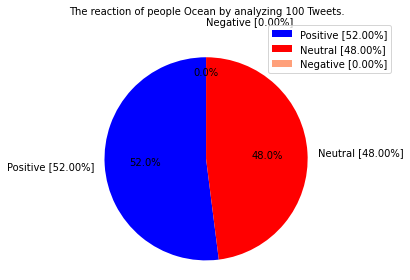

In [74]:
sizes = [positive, neutral, negative]
colors = ['blue','red','lightsalmon']
labels = ['Positive [' + str(positive) + '%]',  'Neutral [' + str(neutral) + '%]',
          'Negative [' + str(negative) + '%]']


plt.pie(sizes, labels = labels, colors = colors, startangle=90, autopct='%1.1f%%', explode=(0,0,1), radius = 4)
plt.legend(labels, loc="best")
plt.title('The reaction of people ' + search_tag+ ' by analyzing ' + str(NoOfTerms) + ' Tweets.', fontsize=10)
plt.axis('equal')
plt.tight_layout()
plt.show()